In [1]:
%matplotlib tk
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/jleland/Coding/Projects/flopter')
import splopter as spl
import fitters as f
import constants as c
import normalisation as n
import matplotlib.pyplot as plt
import numpy as np
import classes.spicedata as sd
from scipy.signal import argrelmax, savgol_filter
from scipy.io import loadmat
import analysis.spicerun as spr

In [2]:
splp_marc = spl.Splopter('bin/data_m/', 'test/', 'masalatest2/')
# splp_cum = spl.Splopter('bin/data_c/', 'test/', 'cumslow_test/')
splp_cum_altbin = spl.Splopter('bin/data_c/', 'test/', 'cumslow_test1/')

In [3]:
splp_marc.prepare(homogenise=True, make_denormaliser=False)
# splp_cum.prepare(homogenise=True, make_denormaliser=False)
splp_cum_altbin.prepare(homogenise=True, make_denormaliser=False)

/home/jleland/Coding/Environments/python3.6/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/jleland/Coding/Environments/python3.6/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/jleland/Coding/Environments/python3.6/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [6]:
fig = plt.figure()

splp_marc.plot_iv(plot_tot=True, plot_vf=True, show_fl=False, fig=fig)
# splp_cum.plot_iv(plot_tot=True, plot_vf=True, show_fl=False, fig=fig)
splp_cum_altbin.plot_iv(plot_tot=True, plot_vf=True, show_fl=True, fig=fig)

1224 1224
313428
1224 1224
313428


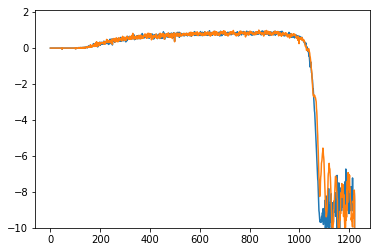

In [24]:
# Method for obtaining total current from an unfinished simulation - not currently working so I've commented it out

# I_e = None
# I_i = None

# plt.figure()
# for j, splp in enumerate([splp_cum, splp_marc]):
#     V = splp.tdata.diagnostics[c.DIAG_PROBE_POT]
#     I_e = np.array([])
#     I_i = np.array([])
#     for i in splp.parser.get_probe_obj_indices():
#         if len(I_e) == 0:
#             I_e = splp.tdata.objectscurrente[i]
#         else:
#             I_e += splp.tdata.objectscurrente[i]
#         if len(I_i) == 0:
#             I_i = splp.tdata.objectscurrenti[i]
#         else:
#             I_i += splp.tdata.objectscurrenti[i]

#     print(len(I_e), len(I_i))
#     print(len(V))
    
#     plt.plot(I_e + I_i, label='{}'.format(j))
#     plt.ylim([-10, 2.1])

In [37]:
# This failed for some reason, look into when at CCFE with some development time.
splp_marc.prepare(homogenise=False, make_denormaliser=True)
splp_cum_altbin.prepare(homogenise=False, make_denormaliser=True)

/home/jleland/Coding/Environments/python3.6/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


ValueError: If mode is 'interp', window_length must be less than or equal to the size of x.

Text(0,0.5,'Current Difference')

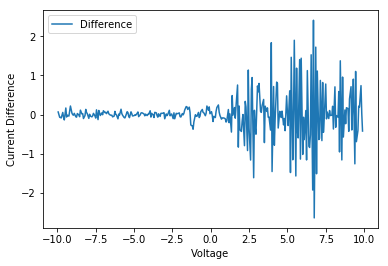

In [39]:
plt.figure()
plt.plot(splp_marc.iv_data['V'][:-1], splp_marc.iv_data['I'][:-1] - splp_cum_altbin.iv_data['I'][:-1], label='Difference')
plt.legend()
plt.xlabel('Voltage')
plt.ylabel('Current Difference')

In [7]:
# iv_trim_c = splp_cum_altbin.trim() 

ivdata_m = splp_marc.trim(trim_beg=0.1, trim_end=0.45)
ivdata_c = splp_cum_altbin.trim(trim_beg=0.1, trim_end=0.45)

ffit_m = splp_marc.fit(ivdata_m, print_fl=True)
ffit_c = splp_cum_altbin.fit(ivdata_c, print_fl=True)

fig1 = plt.figure()
splp_marc.plot_iv(iv_data=ivdata_m, fig=fig1, plot_tot=True, label='Marconi')
splp_cum_altbin.plot_iv(iv_data=ivdata_c, fig=fig1, plot_vf=True, plot_tot=True, label='Cumulus')

fig2 = plt.figure()
splp_marc.plot_f_fit(ffit_m, fig=fig2, plot_vf=False, label=r'Gap - $T_e$ = {:.2g}, $I_{}$ = {:.3g}'
                        .format(ffit_m.get_temp(errors_fl=False), r'{sat}', ffit_m.get_isat(errors_fl=False)))
splp_cum_altbin.plot_f_fit(ffit_c, fig=fig2, label=r'No Gap - $T_e$ = {:.2g}, $I_{}$ = {:.3g}'
                          .format(ffit_c.get_temp(errors_fl=False), '{sat}', ffit_c.get_isat(errors_fl=False)))


/home/jleland/Coding/Environments/python3.6/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/jleland/Coding/Environments/python3.6/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/jleland/Coding/Environments/python3.6/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


[-2.59733326]

FIT PARAMETERS
I_sat = 0.5841565801585966 +/- 0.040867357731304906
a = 0.0625081740125634 +/- 0.02642181642829602
T_e = 0.9290964807166515 +/- 0.03779987585578716
V_f = -2.5469321339101425 +/- 0.022254465262624347

[-2.45212433]

FIT PARAMETERS
I_sat = 0.702477090333472 +/- 0.0574751390422454
a = 7.778092030698335e-15 +/- 0.029201496815196324
T_e = 1.0831708426275266 +/- 0.05648486234768544
V_f = -2.5616826448318735 +/- 0.022951183033771836

